# Exploring backfitting for multiple linear regression

## a. Generating some data

In [139]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_style('whitegrid')
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

np.random.seed(27)

X_1, X_2, e = np.random.normal(loc=4, scale=2, size=100, ), np.random.exponential(size=100), np.random.normal(size=100)
Y = np.full(100, 3) + X_1 + 2*X_2**2 + e

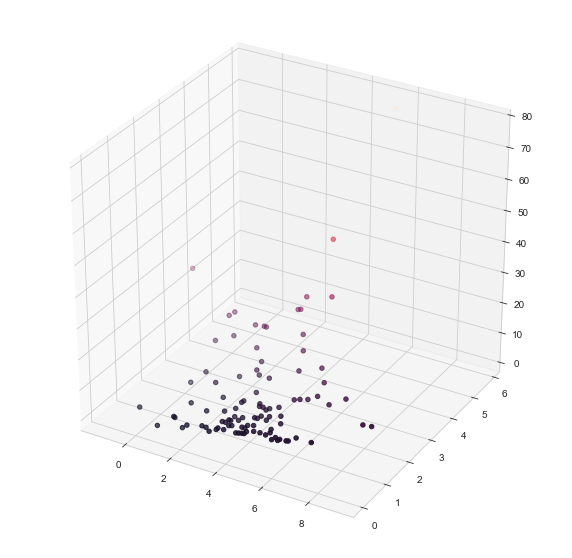

In [140]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_1, X_2, Y, c=Y)

## b. Setting initial value for $\hat{\beta}_1$.

In [141]:
beta_1_hat = 0.2

## c. Fitting $Y - \hat{\beta}_1X_1$

In [142]:
from sklearn.linear_model import LinearRegression

A = Y - beta_1_hat*X_1
linreg = LinearRegression()
linreg.fit(X_2.reshape(-1, 1), A)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [143]:
beta_0_hat = linreg.intercept_
f'beta_0_hat = {beta_0_hat}'

'beta_0_hat = 2.8350247328203544'

In [144]:
beta_2_hat = linreg.coef_[0]
f'beta_2_hat = {beta_2_hat}'

'beta_2_hat = 7.512178662654875'

## d. Fitting $Y - \hat{\beta}_2 X_2$

In [145]:
B = Y - beta_2_hat*X_2
linreg = LinearRegression()
linreg.fit(X_1.reshape(-1, 1), B)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [146]:
beta_0_hat = linreg.intercept_
f'beta_0_hat = {beta_0_hat}'

'beta_0_hat = -0.8300795357307318'

In [147]:
beta_1_hat = linreg.coef_[0]
f'beta_1_hat = {beta_1_hat}'

'beta_1_hat = 1.0727863090555483'

## e., f. Backfitting to estimate OLS multiple regression coefficients

In [148]:
def backfit(beta_0_hat, beta_1_hat, beta_2_hat, n_iters=100):
    coefs = {'beta_0_hat':[beta_0_hat], 'beta_1_hat':[beta_1_hat], 'beta_2_hat':[beta_2_hat]}
    for i in range(n_iters - 1):
        
        # new beta_2_hat
        A = Y - beta_1_hat*X_1
        linreg = LinearRegression()
        linreg.fit(X_2.reshape(-1, 1), A)
        beta_2_hat = linreg.coef_[0]
        
        # new beta_0_hat, beta_1_hat
        B = Y - beta_2_hat*X_2
        linreg = LinearRegression()
        linreg.fit(X_1.reshape(-1, 1), B)
        beta_0_hat, beta_1_hat = linreg.intercept_, linreg.coef_[0]
        
        # update dict
        coefs['beta_0_hat'] += [beta_0_hat]
        coefs['beta_1_hat'] += [beta_1_hat]
        coefs['beta_2_hat'] += [beta_2_hat]
        
    return coefs

In [159]:
n_iters = 20
backfit_coefs = pd.DataFrame(backfit(beta_0_hat, beta_1_hat, beta_2_hat, n_iters=n_iters))
backfit_coefs.head()

,beta_0_hat,beta_1_hat,beta_2_hat
0,-0.830080,1.072786,7.512179
1,-1.132632,1.090675,7.717398
2,-1.138833,1.091042,7.721604
3,-1.138960,1.091049,7.721690
4,-1.138963,1.091050,7.721692


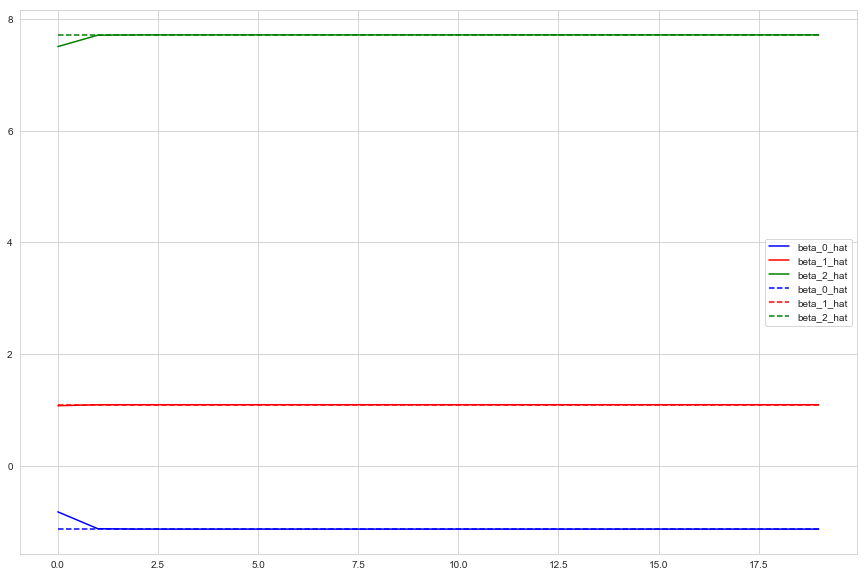

In [167]:
# get OLS multiple regression coeffs
X = np.stack((X_1, X_2), axis=1)
mreg = LinearRegression()
mreg.fit(X, Y)
mreg_coefs = pd.DataFrame({'beta_0_hat': n_iters*[linreg.intercept_], 
              'beta_1_hat': n_iters*[linreg.coef_[0]], 
              'beta_2_hat': n_iters*[linreg.coef_[1]]})

x = np.arange(n_iters)

plt.figure(figsize=(15, 10))
plt.plot(x, backfit_coefs['beta_0_hat'], color='blue')
plt.plot(x, backfit_coefs['beta_1_hat'], color='red')
plt.plot(x, backfit_coefs['beta_2_hat'], color='green')

plt.plot(x, mreg_coefs['beta_0_hat'], color='blue', linestyle='dashed')
plt.plot(x, mreg_coefs['beta_1_hat'], color='red', linestyle='dashed')
plt.plot(x, mreg_coefs['beta_2_hat'], color='green', linestyle='dashed')

plt.legend()

## g. How may iterations needed for a good approximation?

In [168]:
# differences of backfit and mreg coefs
backfit_coefs - mreg_coefs

,beta_0_hat,beta_1_hat,beta_2_hat
0,3.088834e-01,-1.826322e-02,-2.095132e-01
1,6.330967e-03,-3.743286e-04,-4.294247e-03
2,1.297614e-04,-7.672352e-06,-8.801619e-05
3,2.659630e-06,-1.572549e-07,-1.804007e-06
4,5.451259e-08,-3.223144e-09,-3.697547e-08
5,1.117309e-09,-6.606249e-11,-7.578631e-10
6,2.290435e-11,-1.354250e-12,-1.553691e-11
7,4.729550e-13,-2.797762e-14,-3.206324e-13
8,1.287859e-14,-4.440892e-16,-1.065814e-14
9,2.220446e-15,0.000000e+00,-2.664535e-15


The differences are all exceedingly small after only a few iterations